# Spectrogram Tinkering
In this notebook I will be working to gain a better understanding of the relationship between waveform data and spectrograms by using synthetic data and noise to plot well understood points.

I will begin by plotting a simple sin wave and will then proceed by adding noise.

In [9]:
# basic imports
import numpy as np
import matplotlib.pyplot as plt

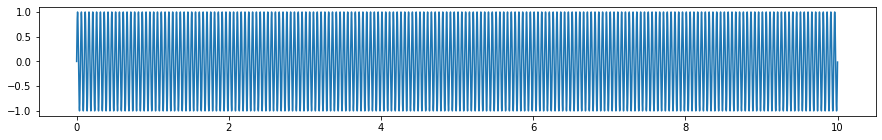

In [40]:
dt = 0.0001
times = np.arange(0.0, 10.0, dt)
data = np.sin(2 * np.pi * times * 20)

plt.figure(figsize=(15,2))
plt.plot(times, data)

plt.show()

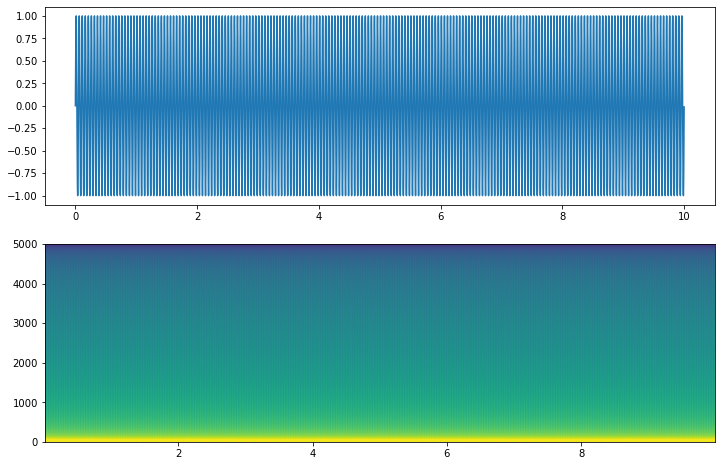

In [42]:
x = data # the signal
NFFT = 256      # the length of the windowing segments
Fs = int(1.0/dt)  # the sampling frequency

# Pxx is the segments x freqs array of instantaneous power, freqs is
# the frequency vector, bins are the centers of the time bins in which
# the power is computed, and im is the matplotlib.image.AxesImage
# instance

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(times, x)
ax1 = plt.subplot(212)
ax1.set_ylim(0, 100)
Pxx, freqs, bins, im = plt.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=255)
plt.show()

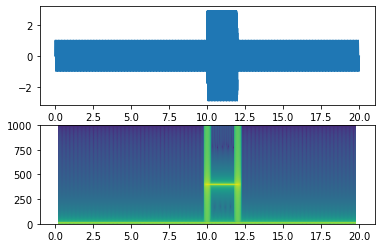

In [37]:
import matplotlib.pyplot as plt
import numpy as np

dt = 0.0005
t = np.arange(0.0, 20.0, dt)
s1 = np.sin(2*np.pi*10*t)
s2 = 2*np.sin(2*np.pi*400*t)

# create a transient "chirp"
mask = np.where(np.logical_and(t > 10, t < 12), 1.0, 0.0)
s2 = s2 * mask

# add some noise into the mix
nse = 0.01*np.random.random(size=len(t))

x = s1 + s2 #+ nse  # the signal
NFFT = 1024       # the length of the windowing segments
Fs = int(1.0/dt)  # the sampling frequency

# Pxx is the segments x freqs array of instantaneous power, freqs is
# the frequency vector, bins are the centers of the time bins in which
# the power is computed, and im is the matplotlib.image.AxesImage
# instance

ax1 = plt.subplot(211)
plt.plot(t, x)
ax2 = plt.subplot(212, sharex=ax1)
ax2.set_ylim((0, 100))
Pxx, freqs, bins, im = plt.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
plt.show()

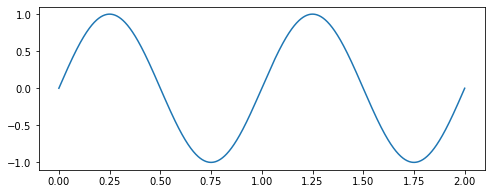

In [85]:
# synthetic data for a simple sin wave
data_s = np.sin(np.linspace(0,4 *np.pi,1000))
times_s = np.linspace(0,2,1000)

# plotting the data
plt.figure(figsize=(8,3))
plt.plot(times_s, data_s)
plt.show()

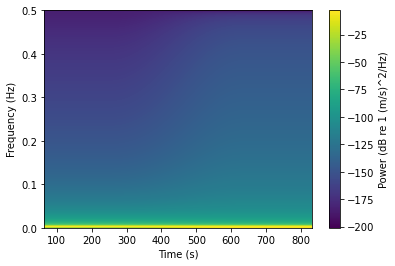

In [86]:
fig = plt.figure()

power, freqs, time, im = plt.specgram(data_s, Fs = 1, NFFT=512, scale_by_freq = False) 
# ax1.set_ylim(0.0, 0.07)

# Format plot attributes 
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

# setting the title of the image
# title = str(starttime) + ' - ' + str(endtime) + ": " + net + '.' + sta + '.' + loc + '.' + chan
# plt.title(title)


cbar = plt.colorbar(im)
cbar.set_label("Power (dB re 1 (m/s)^2/Hz)")
# mappable = ax1.images[0]

# save figure
# if loc == "--":
#     filename = net + '-' + sta + '-' + chan + ".jpg"
# else:
#     filename = net + '-' + sta + '-' + loc + '-' + chan + ".jpg"
# plt.savefig('GeneratedSpectrograms/' + filename,  bbox_inches='tight');


# plt.colorbar(mappable=mappable, cax = ax2)
# mappable.set_clim(-20, +20)

plt.show();

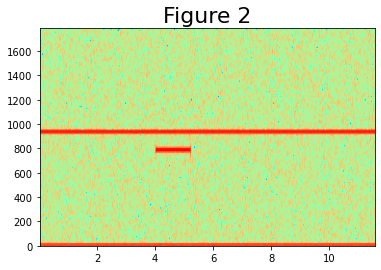

In [71]:
import matplotlib.pyplot as plt

import numpy as np

np.random.seed(9360801)

d_t = 0.0007

time = np.arange(1.0, 30.0, d_t)

sig1 = np.sin(5 * np.pi * 150 * time)

sig2 = 1.4 * np.sin(1.4 * np.pi * 450 * time)

sig2[time <= 11] = sig2[14 <= time] = 0

noise = 0.8 * np.random.random(size = len(time))

a = sig1 + sig2 + noise
# a = sig1 + noise
# a = sig1
NFFT = 620

Fs = int(2.5 / d_t)

plt.specgram(a, Fs = Fs, cmap = "rainbow")

plt.title('Figure 2',

fontsize = 22, fontweight ='normal')

plt.show()

/tmp/ipykernel_246759/2964984923.py:15: UserWarning: Only one segment is calculated since parameter NFFT (=2056) >= signal length (=29).
  power, freqs, bins, im = ax.specgram(b, NFFT=NFFT, Fs=Fs, noverlap=800)


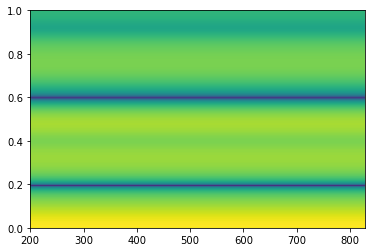

In [8]:
time_intervals = 1

times = np.arange(1.0, 30.0, time_intervals)
# sig1 = np.sin(3 * np.pi * 200 * t)
# sig2 = 3 * np.sin(3 * np.pi * 500 * t)
# sig2[t <= 11] = sig2[13 <= t] = 0

noise = 0.02 * np.random.random(size=len(sig1))
b = sig1

NFFT = 2056
Fs = int(2.0 /time_intervals)
ax = plt.gca()

power, freqs, bins, im = ax.specgram(b, NFFT=NFFT, Fs=Fs, noverlap=800)

plt.show()

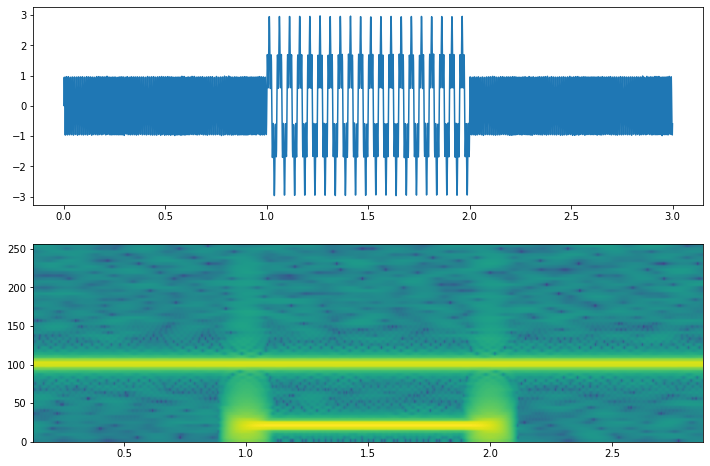

In [83]:
dt = 0.001
t = np.arange(0.0, 3.0, dt)
s1 = np.sin(2*np.pi*100*t)
s2 = 2*np.sin(2*np.pi*20*t)

# create a transient "chirp"
mask = np.where(np.logical_and(t>1, t<2), 1.0, 0.0)
s2 = s2 * mask

# add some noise into the mix
nse = 0.01*np.random.randn(len(t))

x = s1 + s2 + nse # the signal
NFFT = 256      # the length of the windowing segments
Fs = int(1.0/dt)  # the sampling frequency

# Pxx is the segments x freqs array of instantaneous power, freqs is
# the frequency vector, bins are the centers of the time bins in which
# the power is computed, and im is the matplotlib.image.AxesImage
# instance

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(t, x)
ax1 = plt.subplot(212)
Pxx, freqs, bins, im = plt.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=255)
ax1.set_ylim((0,256))
plt.show()

# Understanding the FT (and FFT)
I will be using some basic software to find the dominant frequencies and their amplitudes in a synthetic signal.

In [28]:
# basic imports
import numpy as np
import matplotlib.pyplot as plt

In [29]:
data_s = np.sin(np.linspace(0,4*np.pi,10000))
x = np.linspace(0, 4 * np.pi, 10000)
noise = np.random.normal(0,0.1, data_s.size)
data_s += noise

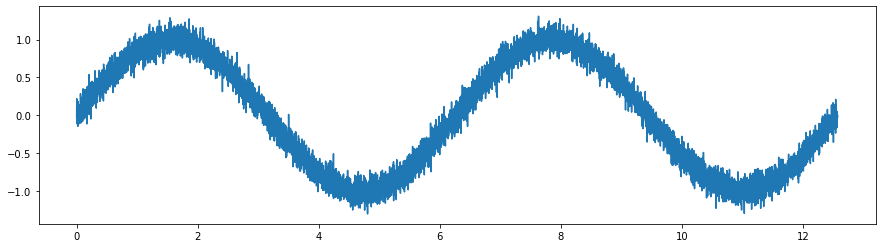

In [30]:
plt.figure(figsize=(15,4))
plt.plot(x, data_s)

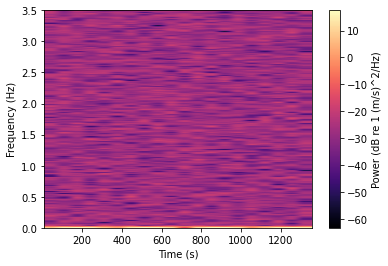

In [33]:
fig = plt.figure()

power, freqs, time, im = plt.specgram(data_s,Fs = 7, NFFT=600, 
                                      mode='psd', scale='dB', cmap='magma', scale_by_freq=True) 
ax1.set_ylim(0.0, 0.07)

# Format plot attributes 
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

# setting the title of the image
# title = str(starttime) + ' - ' + str(endtime) + ": " + net + '.' + sta + '.' + loc + '.' + chan
# plt.title(title)


cbar = plt.colorbar(im)
cbar.set_label("Power (dB re 1 (m/s)^2/Hz)")
mappable = ax1.images[0]

# save figure
# if loc == "--":
#     filename = net + '-' + sta + '-' + chan + ".jpg"
# else:
#     filename = net + '-' + sta + '-' + loc + '-' + chan + ".jpg"
# plt.savefig('GeneratedSpectrograms/' + filename,  bbox_inches='tight');


# plt.colorbar(mappable=mappable, cax = ax2)
mappable.set_clim(-200, +90)

plt.show();

In [55]:
ft = np.fft.fft(data_s)

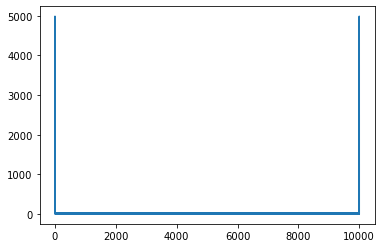

In [56]:
plt.plot(np.abs(ft))